# iOS Simple App

## Overview

**What you'll learn**

In this section you'll learn

 1. How to add UI elements to the screen (buttons, labels, etc)
 2. How to use a Table View to create a list
 3. How to add View Controllers 
 2. How to use the APIs that come with different templates (SpriteKit, RealityKit, ARKit) 

**Prerequisites**

Before starting this section, you should have an understanding of

 1. Experience with programming in any language
 2. Have Xcode installed on your computer

**Introduction**

This section will cover the basics of making an app, but it defintitely is not fully inclusive. One thing nice about mobile development is that there are tons of tutorials available online as well as strong question support. If there is something you want to learn more about, feel free to Google it and see what you find! 

## Basics of Making An App
#### Buttons
In the Introduction section, you learned how to add a label to the screen. You can add a button to the screen in a similar way!

Click in the Main.Storyboard file .

In the top right corner of XCode, click the + button. You can search for "Button", and then drag and drop it in!

Just like a label, you can double click the button to change the text to say "Press me", or whatever you want it to say.

When you click on the button and click on the Attribute Inspector, which is circled in red in the image below, you can change the button to appear how you want! You can change the font type, font size, font color, background image, etc. Change the 'Title' from Plain to Attributed to see the font changes.

Anything that you can change there, you can also change programatically. We will get more into how to do that later.

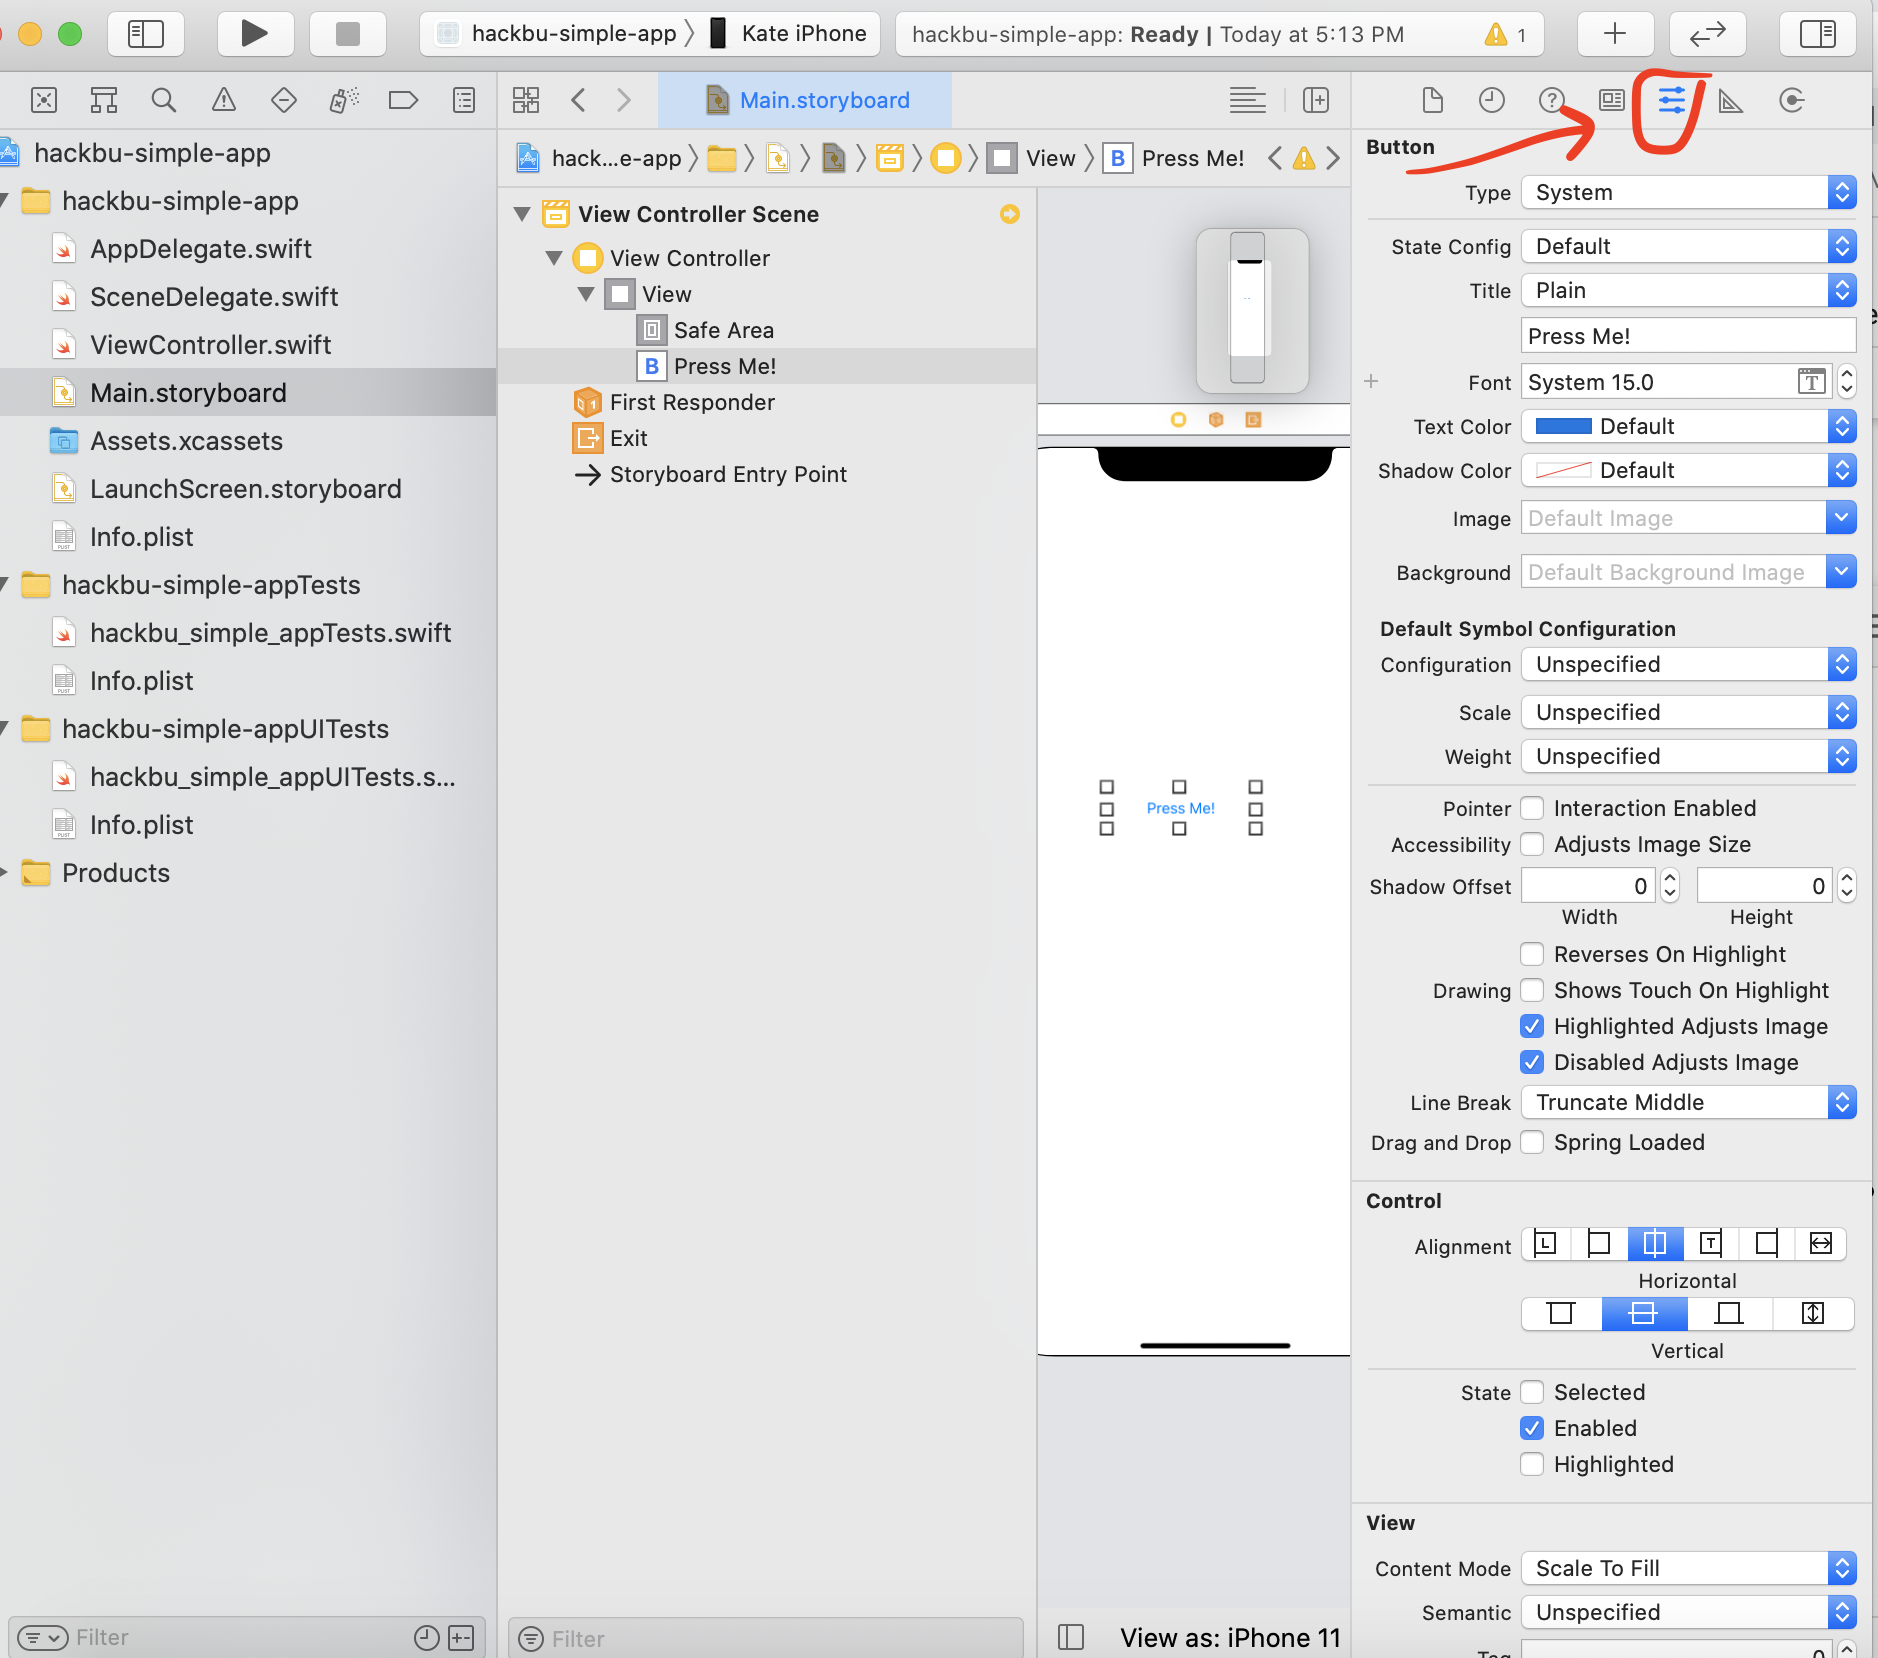

Now that you have a button on the screen, you probably want to make it actually do something. 


If you don't already have a "Hello World" label on your screen from the Introduction, go ahead and add one now.

Go into the file ViewController.swift

It should already have the following code: 



```
import UIKit

class ViewController: UIViewController {

    override func viewDidLoad() {
        super.viewDidLoad()
        // Do any additional setup after loading the view.
    }

}

```

We are going to add a function into this file that changes the text of the "Hello World" label to say "Goodnight World" 

The function can be named whatever you want, but mine will be called ```clickMyButton```

After the viewDidLoad() function, add your function. 

To declare the function to be something that can run when a button is pressed, it will look like: 

 ``` 
 @IBAction func clickMyButton(sender: UIButton){
   
    }
```




Now, lets get to coding our function.

We want to change the text of our "Hello World" label, so we need to be able to access that label in the code.  
To be able to do this:
1. Declare the following variable at the beginning of the class:

 ``` @IBOutlet var myLabel: UILabel! ``` 

 This is how you can declare different UI elements in your code. If you were declaring a variable that was a button, it would be the same thing, except ```UILabel!``` would be ```UIButton!``` (and you probably wouldn't want to call it ```myLabel```)

2. Go to Main.storyboard and hold ctrl while clicking on "View Controller". You should get the black menu as shown in the screen below.   From here, you can hold ctrl and drag from where it says "myLabel" to the actual label.

Now ```myLabel``` refers to the label on your screen so when we reference it in the code, any changes will be applied to this label!


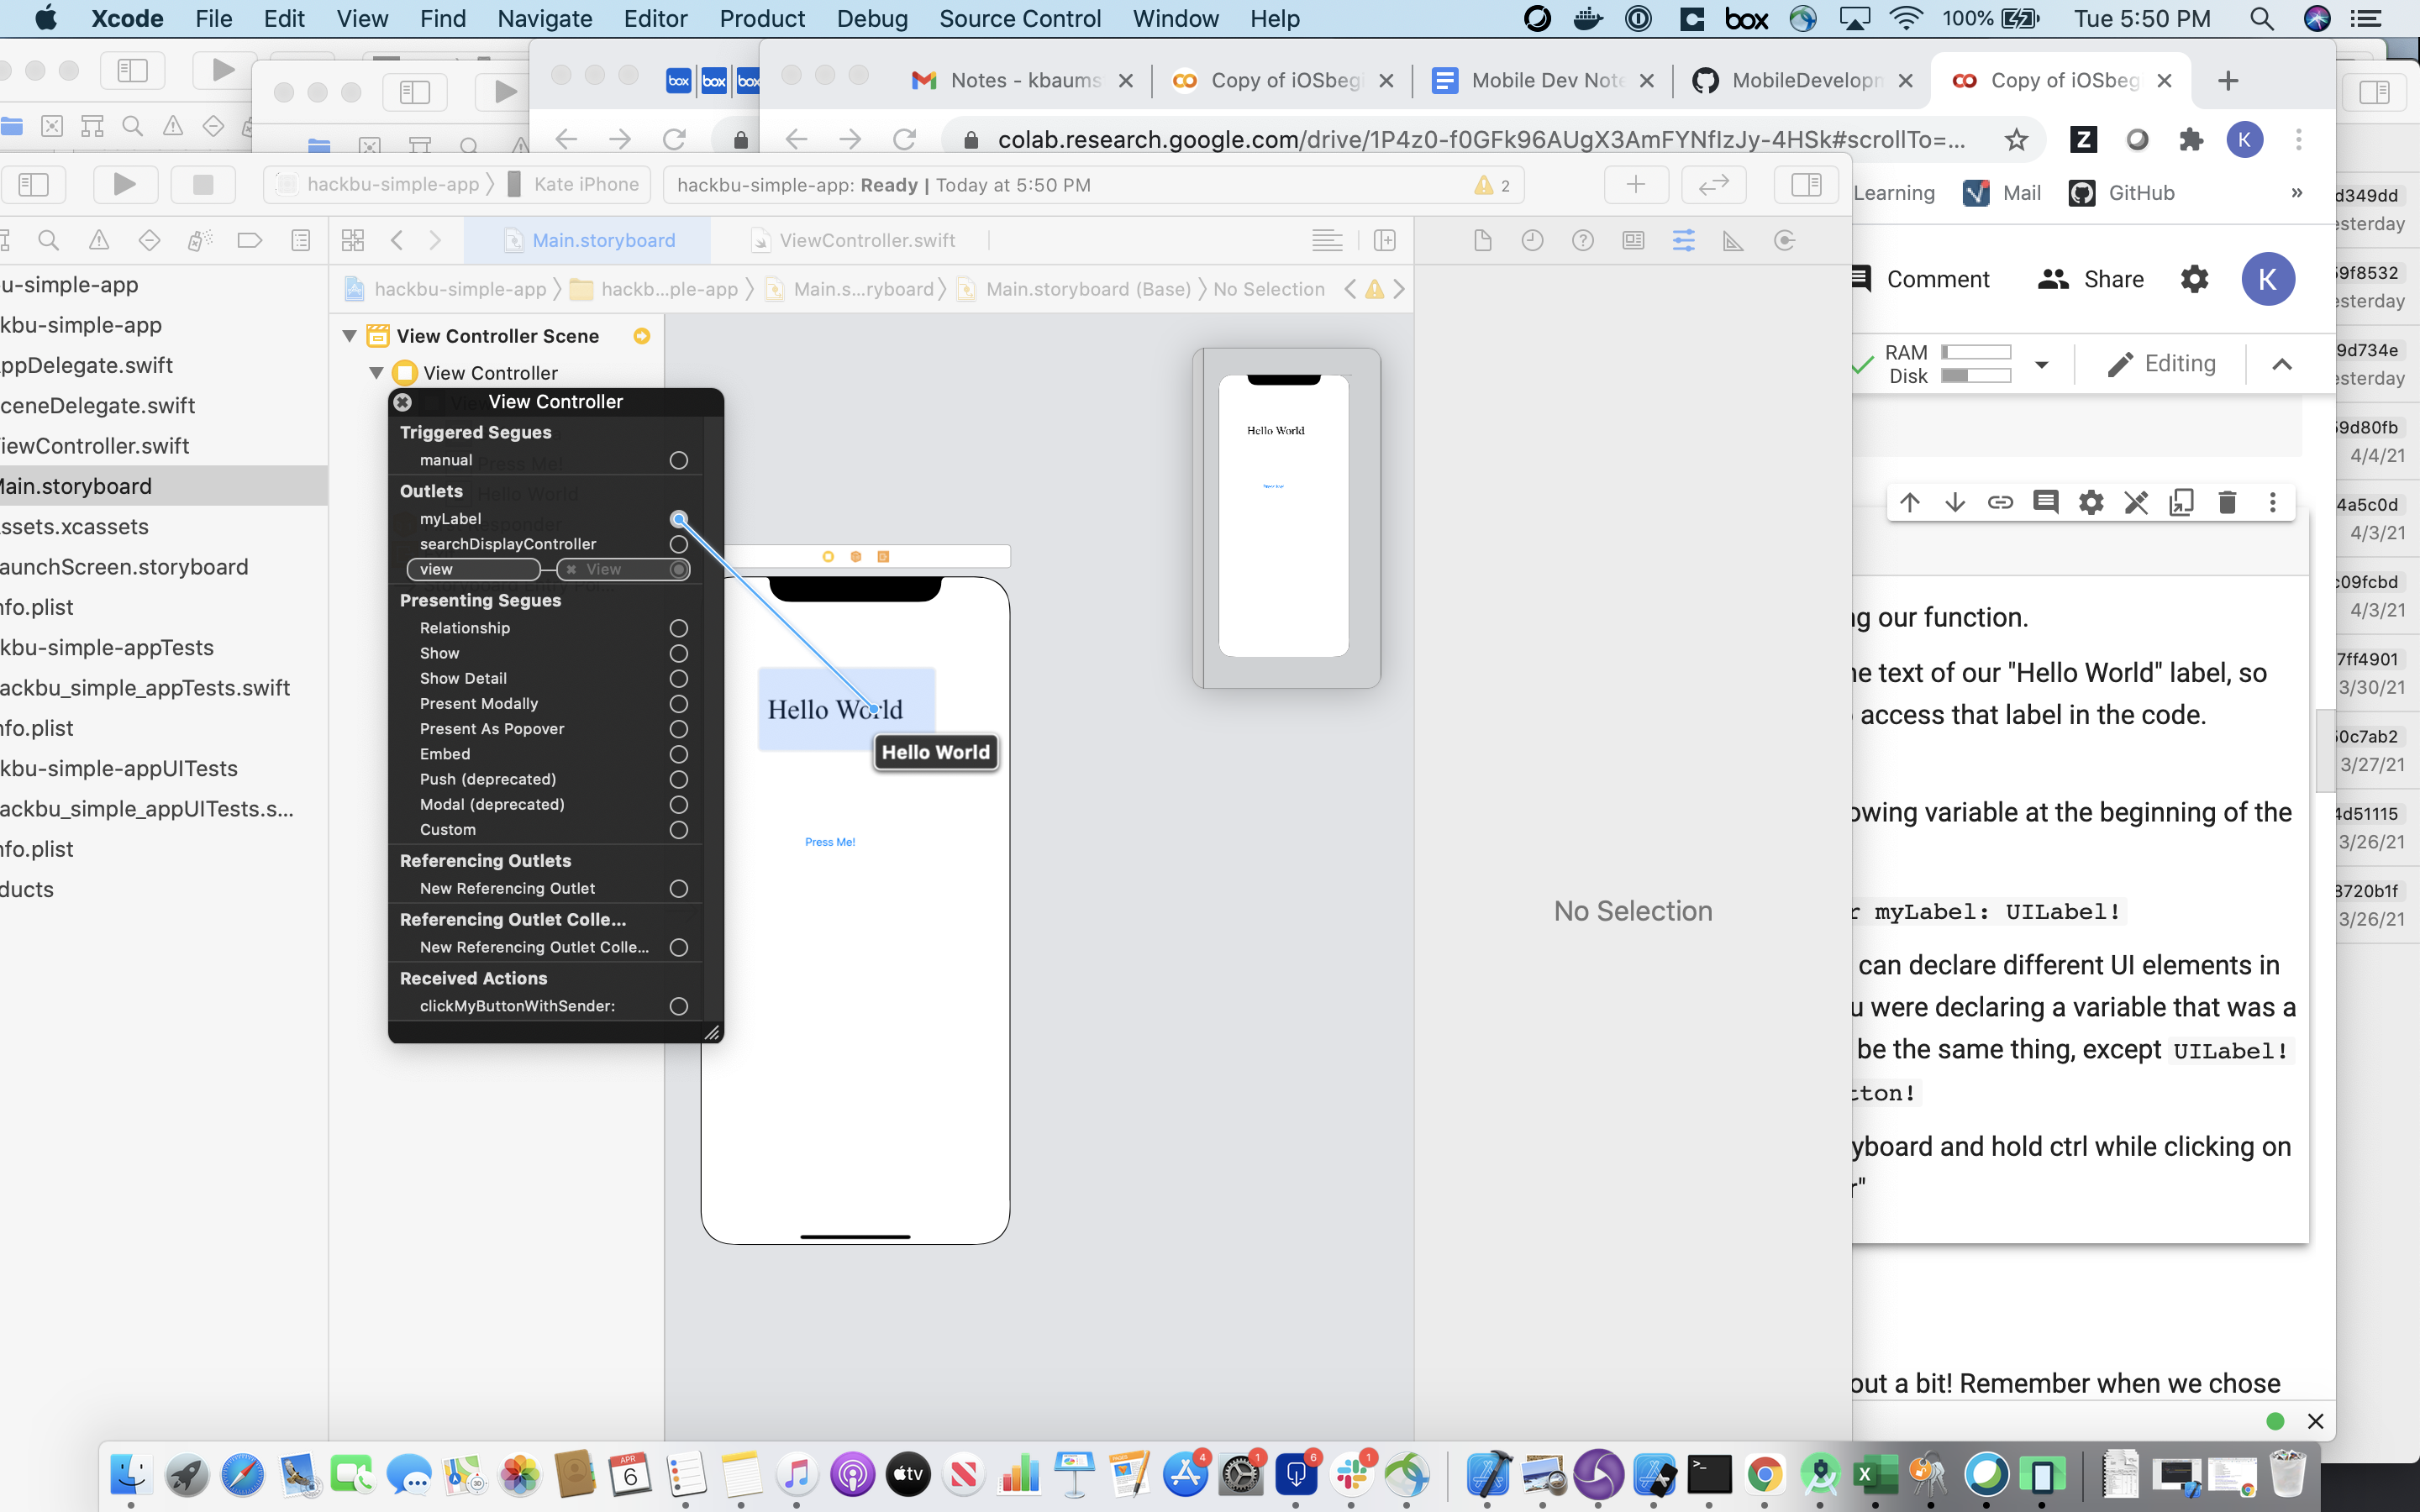

Now go back to ViewController.swift


In our function ```clickMyButton``` , we can now change the text of our label.

To change the text of the label, all we have to do is:

```myLabel.text = "Goodnight World" ``` 

To make the text go back and forth between "Hello World" and Goodnight World", we can have the text change based on what the text currently is. So the function would look like



```
@IBAction func clickMyButton(sender: UIButton){
      if(myLabel.text == "Hello World"){
          myLabel.text = "Goodnight World"
      }
      else if(myLabel.text == "Goodnight World"){
          myLabel.text = "Hello World"
      }
    
}

```


Now, all we have to do is connect the button on the screen to this function!

In the same way we connected ```myLabel``` to the label on the screen, Go to Main.storyboard and hold down ctrl while clicking View Controller. At the bottom of the black list, under "Received Actions", you should see the function name "clickMyButtonWithSender"

Connect that to the button on the screen by holding ctrl and dragging the line to the button. It will give you a list of different options that determine when the button is pressed. "Touch up inside" is what a majority of apps use now, but you can choose whatever option you would like. 

Now that the function is connected to the button, everytime that button is pressed that function will be called.

Now you should be good to go! Run your app and press the button to see it in action!


Play around with making the button change other things like the background color of the button or screen, making another label visible or hidden, or anything you can think of! 


### TextFields 

Adding a text field where the user can type something in is very similar to adding a button and a label. 

Go to Main.storyboard and click on the + button in the top right corner. Search for "Text Field" and drag and drop it onto the screen.

If you click on the text field and look at the Attribute Inspector on the right, you can see that there's also many formatting options. For one, you can set a placeholder text for when nothing has been typed into the field yet.

If you run your app, you can see that you can type in the Text Field, but there's nothing to do with that text. Usually there's a button that will do something with that text. For example, if you are making a grocery list, you can type an item into the text field and have an "Add" button that adds something to the list.

We will practice this once we learn about making lists in the next section about Table Views. 




### Table Views

Table Views are very useful when you have a list that you will be adding to/deleting from. 


Go to Main.storyboard and click on the + button in the top right corner. Search for "Table View" and drag and drop it onto the screen.

You can expand it a bit so it fills up more of the screen. 

Click on the table view, and look at the Attribute Inspector on the right. 
Change the number of prototype cells to 1 (This is the second item in the list of the Attribute Inspector)

Click on the cell that appeared in the table view, and in the Attribute Inspector the second item in the list should be "Identifier". Type "listItem" into this field

To get started so we can add things to the list, add another button to the screen and make sure the text field is still there.

We are going to use an array to keep track of the items in the list.


First, go into ViewController.swift, and add ```UITableViewDelegate, UITableViewDataSource``` after ```UIViewController```. These are classes that the ViewController inherits from.

So the class declaration will look like:
```
class ViewController: UIViewController, UITableViewDelegate, UITableViewDataSource {

    ...
}

```

Now, in the function ```viewDidLoad()```, add the following 2 lines: 

``` 
tableView.delegate = self
tableView.dataSource = self
```

This allows the table view to actually get it's information/data from the code we are going to write below.

Now, in the ViewController class declare the array, textfield and the table view so we can access them programatically. This will look like:
 
 ```
@IBOutlet var tableView: UITableView!
@IBOutlet var addItemTextField : UITextField!
var items : [String] =  []

 ```

In Main.Storyboard, like we did for our "Hello World" label, we have to connect these variables to elements on the screen. Right click on View Controller and "tableView" and "addItemTextField" should be in the list. Drag "tableView" line to touch the table view on the screen, and drag the "addItemTextField" to touch the text field on the screen.


The table view has to know how many cells should be in the table, which is the number of items in the list/array. To tell the table view that how many items will be in the last, add the following function to the ViewController class. This function just returns the length of the list

```
func tableView(_ tause the bleView: UITableView, numberOfRowsInSection section: Int) -> Int {
    return items.count
}
```


Now, we want the table view to actually display all of the items in our list

In the following function, we will index of an item in our list ```items``` to determine what text that cell will display. 

```
  func tableView(_ tableView: UITableView, cellForRowAt indexPath: IndexPath) -> UITableViewCell {
      let cell = tableView.dequeueReusableCell(withIdentifier: "listItem", for: indexPath)
      let item = items[indexPath.row]
      cell.textLabel?.text = item
      return cell
  }

```

At this point, the table view will display everything from our array. 

Now we just need our button to add an item to our array!

You guys already know how to do this from the Buttons section earlier, but we will go through it anyways.


In ViewController.swift, we want to create a function so that when a button is pressed, it adds whatever text is in the text field to the list. 

To get the table view to update after we add an item, we have to call ```tableView.reloadData() ```

That function will look something like:

```
@IBAction func addItem(sender: UIButton){
    items.append(addItemTextField.text!)
    addItemTextField.text = ""  //clears text field  
    tableView.reloadData()
    
}
```
    

Connect this function to the button you added in Main.storyboard, as explained in the Buttons section, and run your app! Type something into the text field, click the add button, and you should see the text appear in your list. 


If you want to be able delete items from your list, you can add the following function to the ViewController class (it implements swiping to delete):

```
func tableView(_ tableView: UITableView, commit editingStyle: UITableViewCell.EditingStyle, forRowAt indexPath: IndexPath) {
    if editingStyle == .delete {
        items.remove(at: indexPath.row)
        tableView.deleteRows(at: [indexPath], with: .fade)
        
    }
}

```





## View Controllers

We've been playing around a lot in ViewController.swift, which contains the items on the screen. However, we are not limited to having just one screen! 


In Main.storyboard, click the + in the top right corner, and search for "View Controller". Drag and drop it and you should see another screen appear!


You can do the same things that you can do on the other view controller on this view controller as well. 


To be able to write code for this View Controller, we can make another class. 

In XCode, press File -> Few -> File -> Cocoa Touch Class 

You can name the class 'SecondViewController' or whatever you want! Make it a subclass of UIViewController from the drop down menu, click next, and put it in the app directory (the same directory as the other ViewController.swift)

Go back to Main.storyboard.
Now we are going to make the new class we made connect to the ViewController we added here. Click on the new ViewController. Directly above the ViewController, there shoulld be 3 yellow icons. Click on the leftmost one (if you hover over it it should say ViewController) This is circled in red next to the 1 in the screenshot below.

On the right, where we look at the Attribute Inspector, click on the option to left of the Attribute Inspector. It should read "Custom Class" at the top.  This is circled in red next to the 2 in the screenshot below.

Where it says "Class", hit the drop down menu and type in "Second View Controller", or whatever you named your new ViewController class.









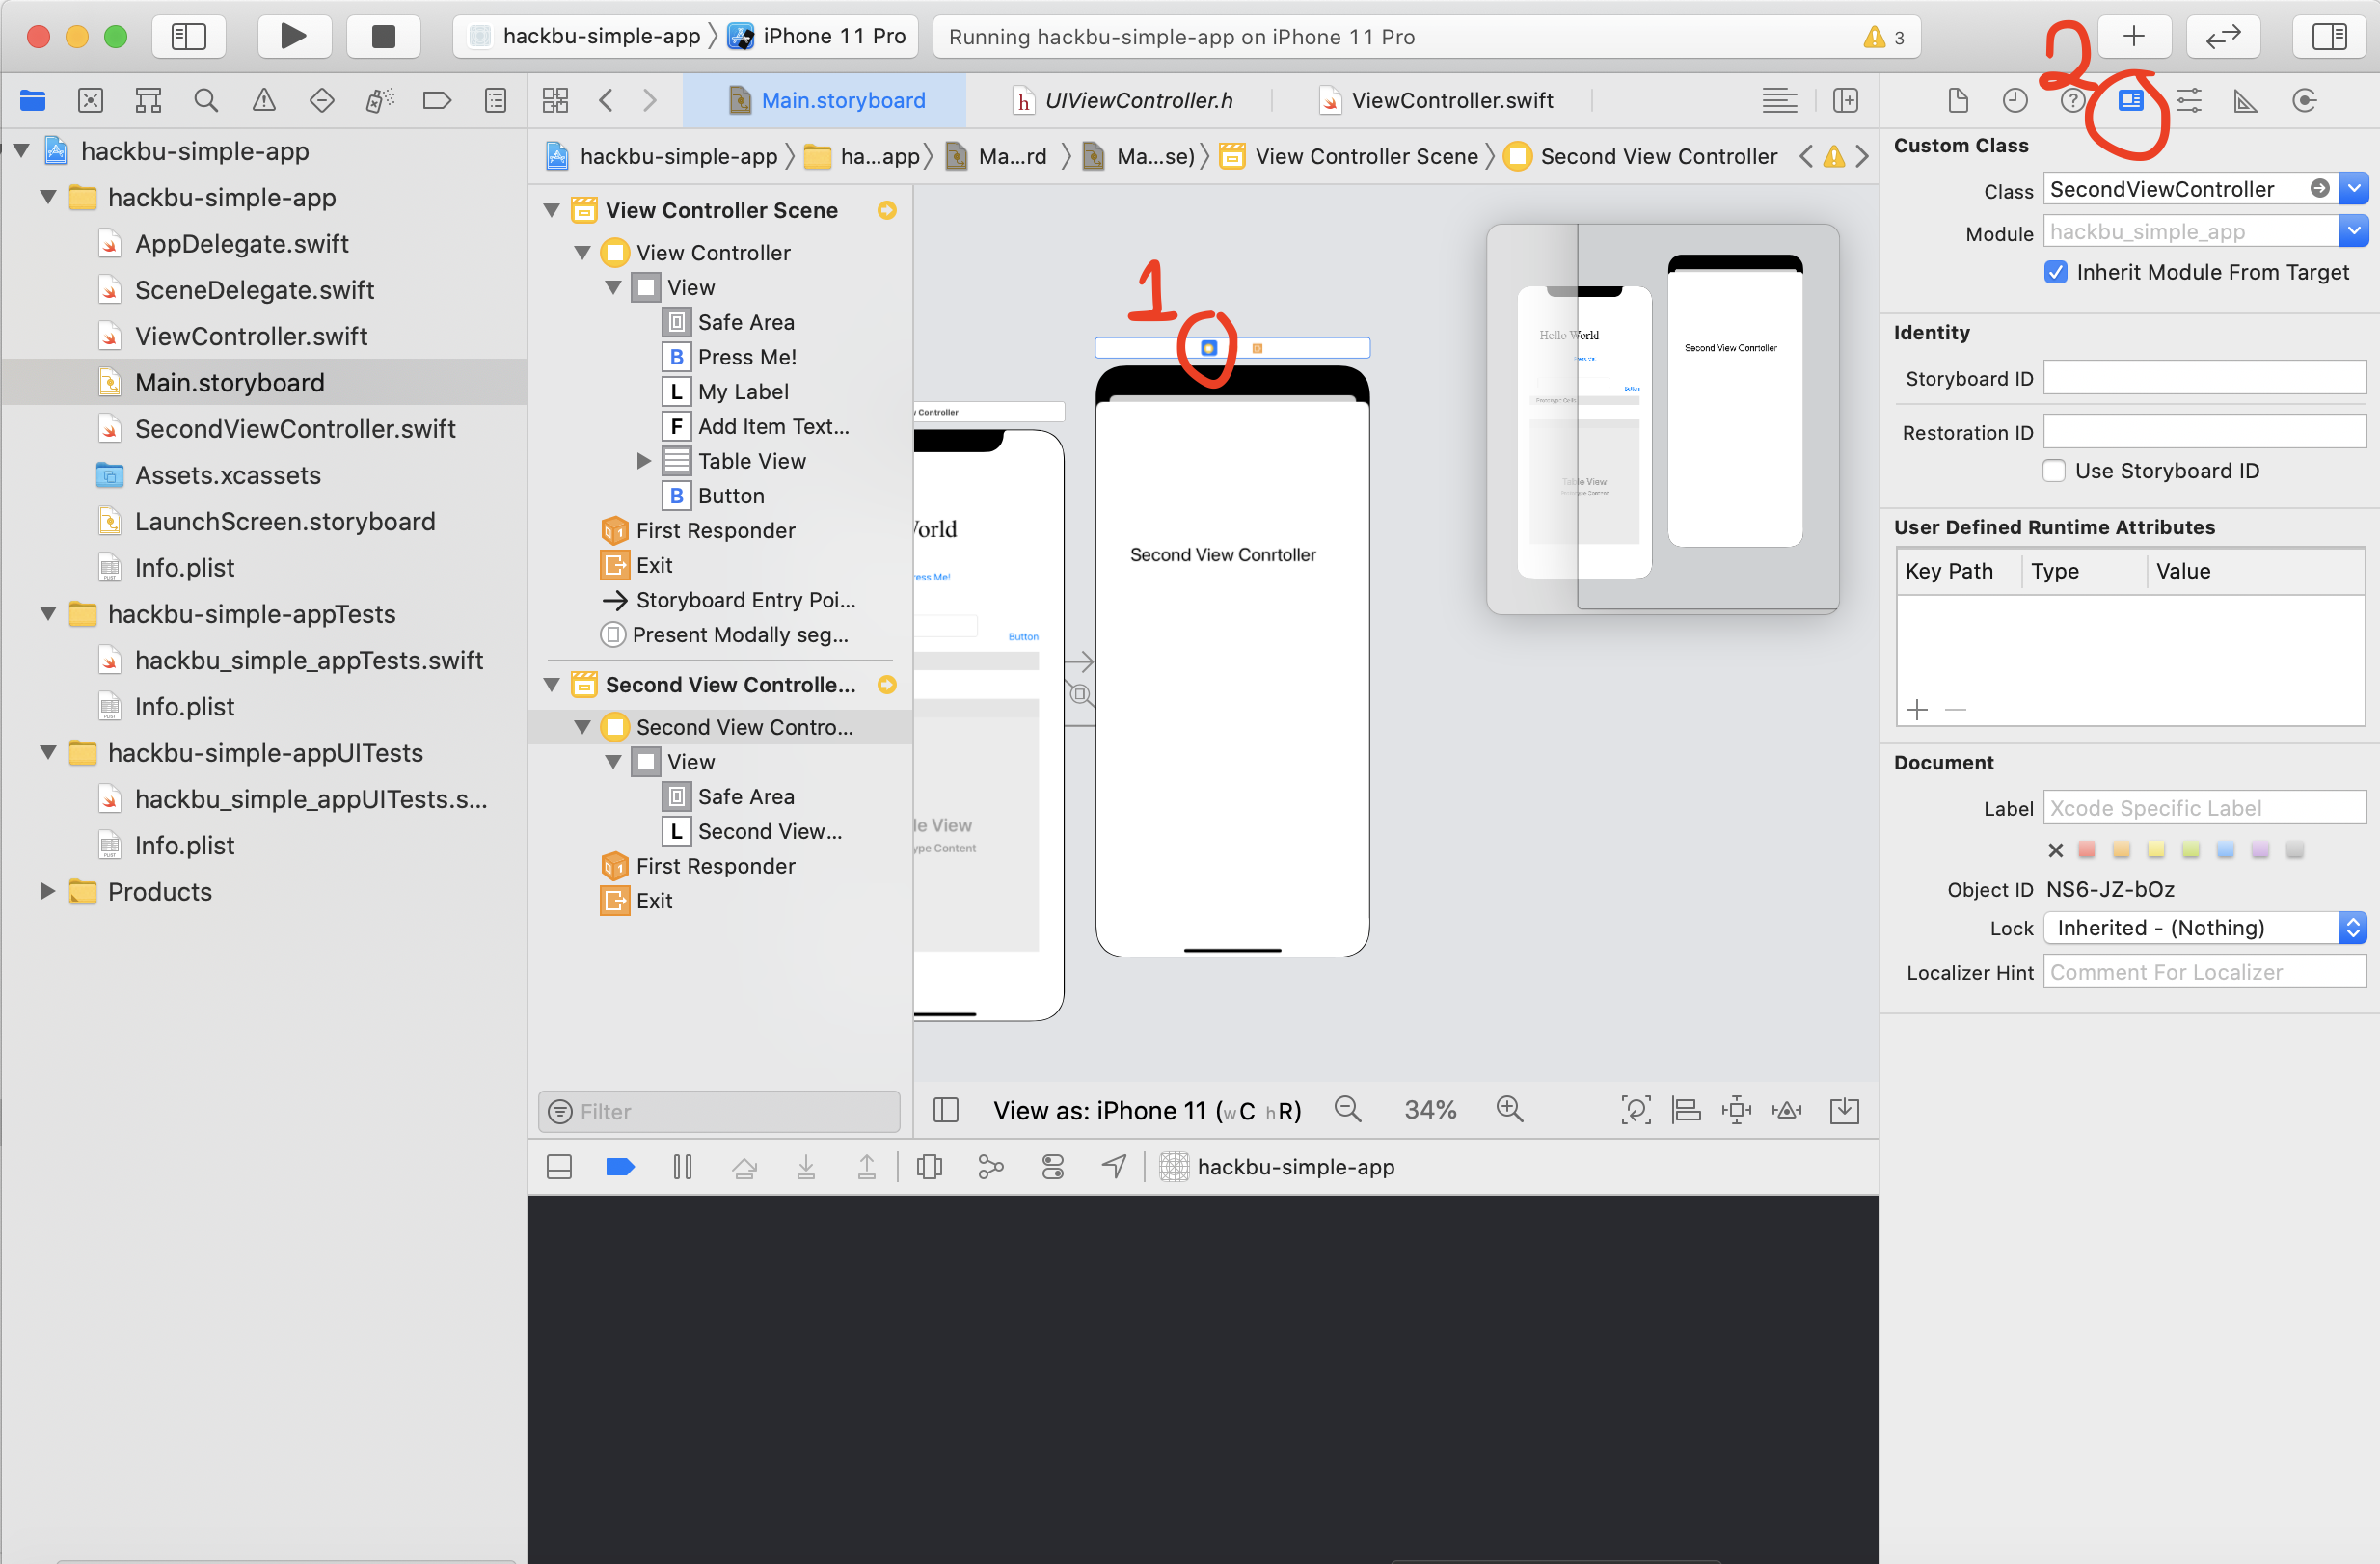



Now, all of the code you write in SecondViewController.swift will apply to this screen! You can play around with adding things to this screen and coding different button actions, etc. 

Add a label onto the new View Controller. 

To get to this View Controller, we can make one of our buttons lead to it.

On one of the buttons from the first ViewController, all you have to do is click and hold ctrl on the button, and drag the line to the new View Controller. It's going to show a list of different Action segues - I usually choose "Present Modally"

Now, if you run your program and click on that button, the new screen should pop up! To get back to the other screen, just slide this screen down. 

## APIs and Templates

Now that you have a bit of experience building an app with Xcode, you can branch out a bit! Remember when we chose **App** as our template when setting up a project? What would happen if we chose **Game** or **Augmented Reality App** as the template?

When you choose a template, you're choosing what files Xcode should set up for you and what APIs it should include for you. API stands for Application Programming Interface, which means it lets you easily use code other people have written in your own project. You only need a basic understanding of APIs to do this section. If you're interested in learning more about them, you can checkout our Webscraping and APIs workshop [here](https://github.com/HackBinghamton/Webscraping-APIsWorkshop). 

We're going to take a look at the two different templates that were mentioned earlier, **Game** and **Augmented Reality App**.

**Game Template**

When you create a Game template, you have a few different options for your **Game Technology**. You can choose between RealityKit, SceneKit, SpriteKit, and Metal. You also have the option to additionally integrate GameplayKit, which is a useful framework for making gameplay easier. We're going to take a look at **SpriteKit**. 

The Game template includes some files we haven't seen before. We have GameScene.sks, Actions.sks, GameScene.swift, and GameViewController.swift. If you take a look at your Main.storyboard, you'll see the view controller there is a Game View Controller instead of a regular View Controller. The GameScene.swift file is where we want to implement our game functionality. 

SpriteKit is awesome for building games because you can easily put something on the screen and move it around. Let's try it!

First, let's remove the default things that come with the Game template. In GameScene.sks, click on the Hello World label and delete it. In GameScene.swift, comment out the body of  `override func didMove(to view: SKView)`.

Now we can make a function to create something on the screen!

In [ ]:
    func makeSprite(){
        //create a SKSpriteNode object, which is what we'll see on the screen
        let baxterSprite = SKSpriteNode(color: SKColor.green, size: CGSize(width: 50, height: 50))
        //tell it where to be on the screen. (0,0) is the middle of the screen
        baxterSprite.position = CGPoint(x: 0, y: 0)
        //give it a name so we can access it later
        baxterSprite.name = "baxter"
        //add it to the scene
        addChild(baxterSprite)
    }

Now make sure to call that function in `override func didMove(to view: SKView)`

In [ ]:
    override func didMove(to view: SKView) {
        makeSprite()
    }

If you test you app now, you'll see a green rectangle on the screen! Very exciting. 

Now let's make it move! The `override func update(_ currentTime: TimeInterval)` method is called every time the frame is rendered, which makes it a great place to write code to move objects.  

In [ ]:
    override func update(_ currentTime: TimeInterval) {
        //get the SKSpriteNode that we called baxter and change its x value
        childNode(withName: "baxter")?.position.x += 5
    }

Now when you test your app, you'll see the green rectangle move to the right. 

Some other helpful things included in SpriteKit are:


*   `node.removeFromParent()` to delete the node from the screen.
*   `enumerateChildNodes(withName: "baxter")` if you had multiple baxter SKSpriteNodes, this lets you loop through them.
*  `node.intersects(anotherNode)` will return a boolean that is true when the two nodes are colliding. 



**Augmented Reality App Template**

AR sounds like it should be pretty advanced to use right? Well ARKit for Xcode makes it a lot easier! 

**NOTE:** to test an app that uses AR, you will need an iPhone. AR can't be tested on the simulator because it needs to use your camera.

When setting up an AR app, we can choose between the same options as for the Game template. This time let's choose **RealityKit**. Once the project loads, you'll see a new file called Experience.rcproject. If you look in this file, you'll see a grey box on a 3D grid. Also if you look at Main.storyboard, you'll see instead of a normal View Controller, we have an ARView. That means that we'll see what the camera is pointing at!

Let's test the default code for our AR app. Open the app on your iPhone and points it at a flat horizontal surface. You should see a grey box, which is the grey box we saw in the Experience.rcproject file! It should look like this (image from this [article](https://medium.com/twinkl-educational-publishers/create-your-first-ar-app-with-realitykit-and-swiftui-7c5d1388b5)):

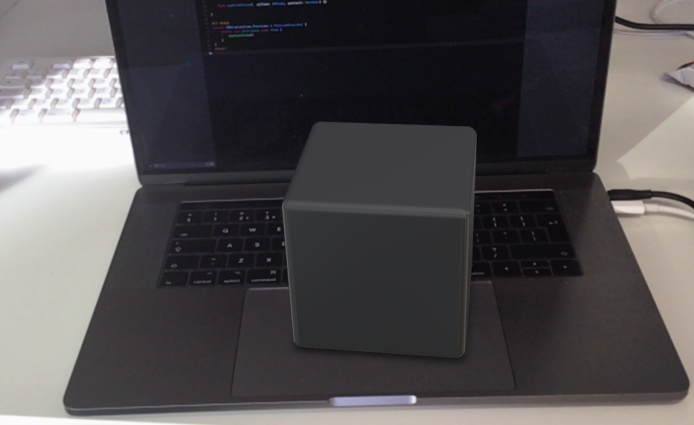

To place your own 3D image, you'll want to find 3D image files online. You should look for images with a .usdz file extension. These can get expensive, but if you look hard there are free ones out there as well.

ARKit is a great framework to import for AR apps in addition to RealityKit. You can use it by putting `import ARKit` at the top of your ViewController.swift file. 

Let's make an app where we place a 3D object onto the screen and we can move it after placing it. First, comment out the default code in `override func viewDidLoad()` in the ViewController.swift file. Instead let's write it like this:




In [ ]:
    override func viewDidLoad() {
        super.viewDidLoad()
        //set the delegate to self, this will be important later
        arView.session.delegate = self
        //for simplicity, we'll automatically configure the settings
        arView.automaticallyConfigureSession = true
        //when someone taps the screen, we want to handle that
        //this line says recognize when someone taps, and when they do send them to the handleTap method
        arView.addGestureRecognizer(UITapGestureRecognizer(target: self, action: #selector(handleTap(recognizer:))))
    }

In the method we just wrote, we said when the screen is tapped go to the handleTap method. However, this method doesn't exist yet so let's write it:

In [ ]:
    @objc func handleTap(recognizer: UITapGestureRecognizer){
            //get the location on the screen that was tapped
            let location = recognizer.location(in: arView)
            let results = arView.raycast(from: location, allowing: .estimatedPlane, alignment: .horizontal)
            //if the ARView recognizes this as a surface, add the anchor
            //an anchor connects the 3D image and the real world location that was tapped
            if let firstResult = results.first {
                //my 3D image is named baxter.usdz
                let anchor = ARAnchor(name: "baxter.usdz", transform: firstResult.worldTransform)
                arView.session.add(anchor: anchor)
            }else{
                //if no surface was recognized, this will print to the console in Xcode
                print("No surface found - could not place obj")
            }
        }

The anchor doesn't magically get placed on the screen. So let's write a method to handle adding the anchor to the session. This method should go at the end of the file AFTER the last semicolon.

In [ ]:
//earlier we set the session delegate to self, but now we need to handle what the delegate actually does
extension ViewController: ARSessionDelegate{
    func session(_ session: ARSession, didAdd anchors: [ARAnchor]) {
        //loop through the anchors we want to add
        for anchor in anchors{
            if let anchorName = anchor.name, anchorName == "baxter.usdz"{
                //place the object attached to the anchor
                placeObject(named: anchorName, for: anchor)
            }
        }
    }
}

Now we've called `placeObject`, but we this method doesn't exist. This is the last method we have to write! It should go after the `handleTap` method.

In [ ]:
    func placeObject(named entityName: String, for anchor: ARAnchor){
        //create the ModelEntity
        //all 3D objects we place will be entities
        let entity = try! ModelEntity.loadModel(named: entityName)
        //the next two lines gives us the ability to move the object after it's placed
        entity.generateCollisionShapes(recursive: true)
        arView.installGestures([.rotation, .translation], for: entity)
        //create an anchor entity
        let anchorEntity = AnchorEntity(anchor: anchor) 
        //add the entity to the anchor so it will be attached to the right location on the screen
        anchorEntity.addChild(entity)
        //add the anchor to the scene, which puts it on the screen
        arView.scene.addAnchor(anchorEntity)
    }

Finally we can test our code! When testing an AR app, you want to move the camera around before actually testing your code. This will let the ARView look for potential surfaces to place objects on. After you move the camera around for a bit, then you can tap the screen to start testing your object placement. 

This was only a start at using ARKit and RealityKit. Something cool to check out for further work with AR apps is tracking configurations. ARKit has different tracking configurations you can choose from. This means that you could focus your AR element on the world (generally anything the camera sees), a face using the selfie camera, or a variety of other things. You can see the full list [here](https://developer.apple.com/documentation/arkit/arconfiguration). 
